In [43]:
import pandas as pd
from scipy.stats import entropy
from statistics import mean

from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib as mpl

import os
os.chdir('/Users/constant/Documents/Lecture/Data Science/Final Project/Data')

In [33]:
def kl_div(df1, df2):
    kl_div_result = []
    for i in range(30):
        n_list = list(df1.iloc[i, 1:11])
        w_list = list(df2.iloc[i, 1:11])
        kl_val = entropy(pk = n_list, qk = w_list)
        kl_div_result.append(kl_val)
    return kl_div_result

In [26]:
n_list = list(sf_n.iloc[0, 1:11])
w_list = list(sf_w.iloc[0, 1:11])

[0.07172353836122583,
 0.02369050206476853,
 0.02434253423168876,
 0.03238426429037166,
 0.07237557052814605,
 0.0969354488154749,
 0.1038904585959574,
 0.11627906976744184,
 0.09432732014779396,
 0.36405129319713103]

In [34]:
def js_dist(df1, df2):
    js_dist_result = []
    for i in range(30):
        n_list = list(df1.iloc[i, 1:11])
        w_list = list(df2.iloc[i, 1:11])
        z_list = [x+y for x,y in zip(list1, list2)]
        z_list = list(map(lambda x:x/2, z_list))
        
        kl1 = entropy(pk = n_list, qk = z_list)
        kl2 = entropy(pk = w_list, qk = z_list)
        
        js_dist = 1/2*(kl1 + kl2)
        js_dist_result.append(js_dist)        
        
    return js_dist_result
        

In [35]:
a = [1,2,3]
b = [2,3,4]
c = [x+y for x,y in zip(a, b)]
list(map(lambda x:x/2, c))


[1.5, 2.5, 3.5]

In [18]:
# def kl_divergence(p, q):
#     return np.sum(np.where(p != 0, p * np.log(p / q), 0))

## 순서에 따라 결과 값이 좀 달라짐..;; ?

# SF

In [36]:
sf_n = pd.read_csv('naver_sf_aggregated_ratio.csv')
sf_w = pd.read_csv('watcha_sf_aggregated_ratio.csv')

sf_n.drop('Unnamed: 0', axis=1, inplace=True)
sf_w.drop('Unnamed: 0', axis=1, inplace=True)

In [37]:
kl_div(sf_n, sf_w)

[0.578586154807397,
 1.789364039117298,
 0.9615684715631564,
 1.4598403601520298,
 0.7224965864506557,
 0.3642896756472582,
 0.7710878944777291,
 0.38498154570967946,
 0.700062821322442,
 0.7099258747911835,
 0.416819645896659,
 0.19223670933699882,
 0.5977968552883867,
 0.20003572289360214,
 0.8474451670590417,
 0.8858200259003776,
 1.2647176034161967,
 0.8878330823258676,
 0.6600176052597057,
 0.5045100377173176,
 0.861227611360537,
 0.7439195529890563,
 0.8279453663591338,
 1.2307522929720136,
 0.7652657331245316,
 0.19320598132098113,
 0.6193161248828574,
 0.41971803224741416,
 0.5298979565564069,
 0.7969700897651376]

In [20]:
# kl_div_result = []
# for i in range(30):
#     n_list = list(dfn.iloc[i, 1:11])
#     w_list = list(dfw.iloc[i, 1:11])
#     kl_val = entropy(pk = n_list, qk = w_list)
#     kl_div_result.append(kl_val)

In [39]:
sf_kl = kl_div(sf_n, sf_w)

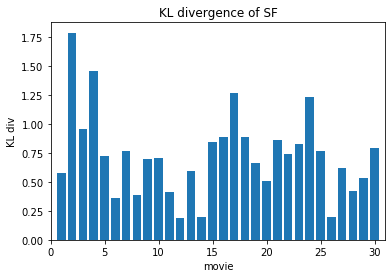

<Figure size 576x720 with 0 Axes>

In [57]:
temp_x = [x+y for x,y in zip(list(range(30)), [1]*30)]

plt.title('KL divergence of SF')
plt.xlabel('movie')
plt.ylabel('KL div')
plt.bar(temp_x, sf_kl)
plt.xlim(0,31)
plt.figure(figsize=(8,10))

plt.show()

In [51]:
mean(kl_div(sf_n, sf_w))

0.7295884873570362

In [70]:
mean(kl_div(sf_w, sf_n))

0.6059249559836185

# Horror

In [58]:
h_n = pd.read_csv('naver_horror_aggregated_ratio.csv')
h_w = pd.read_csv('watcha_horror_aggregated_ratio.csv')

h_n.drop('Unnamed: 0', axis=1, inplace=True)
h_w.drop('Unnamed: 0', axis=1, inplace=True)

In [78]:
kl_div(h_w, h_n)

[0.6342194998782152,
 0.7845237464787588,
 0.8581957258023939,
 0.7999769109309925,
 0.5621185337192934,
 0.9510012915927627,
 0.5497856541885174,
 0.58828580941064,
 0.609122721734777,
 0.7199760505559023,
 0.715914274995775,
 0.6967728262177566,
 0.5928013970638922,
 0.6682048955839104,
 0.4562633784215219,
 0.6509031033268254,
 0.16430585548190935,
 0.5272161524374736,
 0.2626103938021854,
 0.789281507894047,
 0.79228178021935,
 0.976787121770635,
 0.7908911848770214,
 0.9218064693106625,
 0.5897001275489446,
 0.37458981664172275,
 0.7084353316686335,
 0.8184755175147052,
 0.46970452059085094,
 1.0175460043733822]

In [59]:
#kl div 결과 (영화별)
hr_kl = kl_div(h_n, h_w)

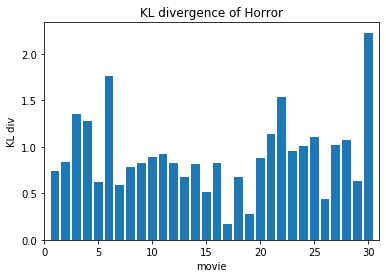

<Figure size 576x720 with 0 Axes>

In [60]:
temp_x = [x+y for x,y in zip(list(range(30)), [1]*30)]

plt.title('KL divergence of Horror')
plt.xlabel('movie')
plt.ylabel('KL div')
plt.bar(temp_x, hr_kl)
plt.xlim(0,31)
plt.figure(figsize=(8,10))

plt.show()

In [105]:
mean(kl_div(h_n, h_w))

0.9127774999615851

In [106]:
mean(kl_div(h_w, h_n))

0.6680565868011152

## 로맨스

In [62]:
rom_n = pd.read_csv('naver_romance_aggregated_ratio.csv')
rom_w = pd.read_csv('watcha_romance_aggregated_ratio.csv')

rom_n.drop('Unnamed: 0', axis=1, inplace=True)
rom_w.drop('Unnamed: 0', axis=1, inplace=True)

In [63]:
ro_kl = kl_div(rom_n, rom_w)

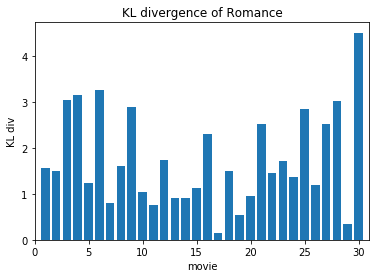

<Figure size 576x720 with 0 Axes>

In [64]:
temp_x = [x+y for x,y in zip(list(range(30)), [1]*30)]

plt.title('KL divergence of Romance')
plt.xlabel('movie')
plt.ylabel('KL div')
plt.bar(temp_x, ro_kl)
plt.xlim(0,31)
plt.figure(figsize=(8,10))

plt.show()

In [136]:
mean(kl_div(rom_n, rom_w))

0.6374274595085146

In [137]:
mean(kl_div(rom_w, rom_n))

0.6286515953021021

### ani


In [66]:
a_n = pd.read_csv('naver_sf_aggregated_ratio (1).csv')
a_w = pd.read_csv('watcha_sf_aggregated_ratio (1).csv')

a_n.drop('Unnamed: 0', axis=1, inplace=True)
a_w.drop('Unnamed: 0', axis=1, inplace=True)

In [67]:
ani_kl = kl_div(a_n, a_w)

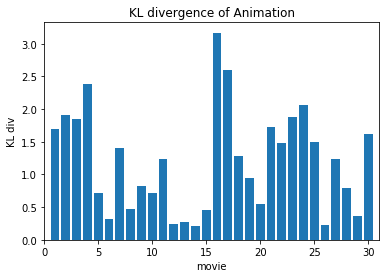

<Figure size 576x720 with 0 Axes>

In [68]:
temp_x = [x+y for x,y in zip(list(range(30)), [1]*30)]

plt.title('KL divergence of Animation')
plt.xlabel('movie')
plt.ylabel('KL div')
plt.bar(temp_x, ani_kl)
plt.xlim(0,31)
plt.figure(figsize=(8,10))

plt.show()

In [69]:
mean(kl_div(a_n, a_w))

1.2047572296016202

In [139]:
df = pd.read_csv('SF\\SF_N.csv')

In [141]:
df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)

In [171]:
df[df['num'] == 11]

,id,date,rating,text,watched,like,dislike,num
64146,ezes****,2015.10.08 11:20,10.0,보면 감자먹고 싶어지는 영화,1,4299,448,11
64147,왕눈이(sooc****),2015.10.08 22:23,9.0,사람은일단똑똑해야된다,0,2927,120,11
64148,드러그엔젤(drug****),2015.10.08 11:32,8.0,화성판 삼시세끼...,0,3243,447,11
64149,박곰95(joon****),2015.10.08 01:12,10.0,최고의 영화. 다만 이 영화를 인터스텔라같은 영화라고 기대하고 보지 마시고 캐스트 ...,0,2497,359,11
64150,d34d****,2015.10.08 08:51,10.0,내가더낫죠? 닐 암스트롱? 이말한마디로 지렷다..,0,2537,453,11
...,...,...,...,...,...,...,...,...
78871,STEELHEART(mool****),2018.08.10 12:24,2.0,인터스텔라 짜투리로 만든느낌. 멧데이는 조연급으로 나와야 영화가산다. 라이언일병부터...,0,2,13,11
78872,ㅎㅈㅇ(jyge****),2015.10.08 10:43,6.0,"결말이 뻔하게 보여서 긴장감이 좀 떨어지고, 감동면에서나 위트면에서나 다소 엉성. ...",1,14,26,11
78873,니체다(niet****),2019.06.29 16:40,1.0,말도 안되고 개지루한 영화. 리들리스콧감독이라 기대했지만 인간은 늙으면 정신적으로도...,0,5,19,11
78874,havehappymind(tele****),2019.07.07 14:49,1.0,별 한개도 아까워 제발 보지마,0,1,19,11


In [ ]:
d

In [153]:
df2 = pd.read_csv('SF\\SF_왓챠.csv')

In [172]:
temp = df2[df2['num'] == 11]

In [173]:
temp.drop('Unnamed: 0', axis = 1, inplace=True)

C:\Users\chris\anaconda3\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [184]:
sf_naver = pd.read_csv('SF\\SF_N.csv')
sf_watcha = pd.read_csv('SF\\SF_왓챠.csv')

In [186]:
sf_naver.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)

In [187]:
sf_naver

,id,date,rating,text,watched,like,dislike,num
0,NaN,2013.06.23 22:16,9.0,하늘소라(sohn****),0,1058,88,1
1,NaN,2013.05.26 15:20,6.0,연경간다(ujin****),0,752,130,1
2,NaN,2013.09.26 02:09,10.0,콘트라단자(pkms****),0,638,25,1
3,NaN,2013.06.13 22:42,10.0,부르주아(jms5****),0,612,80,1
4,NaN,2013.07.17 23:18,3.0,YJ typhoon(yjty****),0,608,143,1
...,...,...,...,...,...,...,...,...
252874,KHY(hyki****),2013.11.10 14:37,1.0,"쓰레기중의 쓰레기 영화. 볼만한 액션이 있는것도 아니고, 스토리 전개는 그야말로 개막장",0,1,5,30
252875,SIC(enjo****),2013.10.17 04:31,1.0,초반에 결말이 너무 뻔히 보여서 재미가 없네요.. 게다가 펼쳐질 결말이 딱2개잖아....,0,1,5,30
252876,으아아아어어어(poop****),2013.08.26 01:00,1.0,노답,0,1,5,30
252877,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t...,2021.10.07 18:00,10.0,스포일러가 포함된 감상평입니다. 감상평 보기,0,0,5,30


In [188]:
sf_watcha

,Unnamed: 0,id,rating,text,num
0,0,최종현,2.0,와 이런상상은 누가하나\n 하 이런구성은 누가했냐,1
1,1,이승수,2.0,이 소재와 배우로 겨우?,1
2,2,김은진,2.0,"아니 대체 이 설정에, 이 배우들을 데리고 어떻게 영화를 이모양을 만들어놓지?;;",1
3,3,이알미,5.0,난 재밌기만 하던데 평점들이 최악이야,1
4,4,juninho,0.5,1등급 한우를 숯불에 태워 버린 느낌,1
...,...,...,...,...,...
86762,1200,체셔고양이,3.0,눈이 굉장히 즐거운 것은 확실하다.,30
86763,1201,Michael Scarn,3.5,추격신이 조금 지루할수도 있지만 나에게는 콜린 파렐의 재발견,30
86764,1202,PlasticTree,2.5,보다가 두번 잠든 영화는 처음..,30
86765,1203,인성ins,3.0,원작을 안 봤던 분들에겐 신선한 소재와 영상미를 느낄 수 있어요~! 하지만 조급한 ...,30


In [189]:
sf_n

,num,1,2,3,4,5,6,7,8,9,10,total_count,mean_rating
0,1,0.071724,0.023691,0.024343,0.032384,0.072376,0.096935,0.103890,0.116279,0.094327,0.364051,4601,7.41
1,2,0.069758,0.060766,0.010277,0.047919,0.017086,0.060509,0.029933,0.120889,0.060509,0.522354,7784,7.81
2,3,0.046892,0.008879,0.011931,0.016648,0.038013,0.054939,0.115705,0.163152,0.148446,0.395394,3604,8.09
3,4,0.058569,0.009501,0.010463,0.022129,0.031269,0.058088,0.072520,0.129405,0.130006,0.478052,8315,8.20
4,5,0.052438,0.007052,0.005551,0.010653,0.015154,0.026632,0.027307,0.047262,0.060390,0.747562,13330,8.95
5,6,0.030048,0.002488,0.002297,0.001722,0.004019,0.008230,0.015502,0.043062,0.088612,0.804019,5225,9.41
6,7,0.015205,0.006628,0.009357,0.009357,0.020663,0.034698,0.079922,0.130994,0.149318,0.543860,2565,8.80
7,8,0.073141,0.010774,0.010774,0.012747,0.020941,0.038240,0.054325,0.125493,0.157815,0.495751,6590,8.27
8,9,0.036318,0.001689,0.000845,0.006757,0.009291,0.010135,0.027027,0.047297,0.109797,0.750845,1184,9.24
9,10,0.055901,0.043113,0.005754,0.029777,0.015437,0.067684,0.036902,0.124224,0.076361,0.544848,10948,8.15


In [190]:
h_n

,num,1,2,3,4,5,6,7,8,9,10,total_count,mean_rating
0,1,0.263073,0.133156,0.013651,0.066173,0.029963,0.086071,0.049977,0.104813,0.027996,0.225127,8644,5.19
1,2,0.173592,0.104579,0.012097,0.043549,0.021835,0.077360,0.037077,0.130043,0.049477,0.350390,16533,6.42
2,3,0.102651,0.070047,0.018094,0.070584,0.034396,0.131136,0.064314,0.170011,0.055536,0.283232,5582,6.68
3,4,0.232498,0.047790,0.035129,0.034012,0.052507,0.066038,0.064176,0.105263,0.073610,0.288977,8056,6.07
4,5,0.169288,0.030611,0.021478,0.026890,0.046339,0.055640,0.073398,0.111618,0.103670,0.361069,5913,6.92
5,6,0.098739,0.030462,0.028361,0.043067,0.056723,0.078782,0.064076,0.128151,0.098739,0.372899,952,7.26
6,7,0.034392,0.013605,0.006047,0.007937,0.015873,0.034392,0.056689,0.101663,0.116402,0.613001,2646,8.78
7,8,0.049029,0.011094,0.010499,0.011985,0.025654,0.036648,0.085281,0.151347,0.169770,0.448693,10096,8.32
8,9,0.390273,0.090154,0.047450,0.058719,0.062871,0.077699,0.042112,0.045670,0.040925,0.144128,1686,4.20
9,10,0.058097,0.012709,0.009985,0.016158,0.017792,0.044844,0.055374,0.129993,0.128722,0.526325,5508,8.39


In [191]:
h_w

,num,1,2,3,4,5,6,7,8,9,10,total_count,mean_rating
0,1,0.076923,0.044032,0.048276,0.100265,0.128382,0.225995,0.216976,0.107162,0.029178,0.022812,1885,5.58
1,2,0.055242,0.026993,0.036409,0.079096,0.119272,0.268675,0.215317,0.118016,0.033898,0.047081,1593,5.97
2,3,0.062897,0.068615,0.133418,0.206480,0.221728,0.166455,0.095934,0.031131,0.008259,0.005083,1574,4.58
3,4,0.070819,0.078855,0.090909,0.166750,0.196384,0.212958,0.115520,0.050728,0.010045,0.007032,1991,4.80
4,5,0.064849,0.028740,0.033898,0.075903,0.106116,0.233604,0.214444,0.138541,0.036846,0.067060,1357,6.07
5,6,0.025850,0.065306,0.088435,0.190476,0.239456,0.219048,0.117007,0.043537,0.004082,0.006803,735,4.97
6,7,0.004950,0.007921,0.000990,0.017822,0.030693,0.092079,0.183168,0.336634,0.152475,0.173267,1010,7.88
7,8,0.012210,0.003663,0.012210,0.013431,0.037851,0.117216,0.267399,0.356532,0.123321,0.056166,819,7.40
8,9,0.064048,0.088218,0.094260,0.202417,0.181873,0.193958,0.090634,0.060423,0.011480,0.012689,1655,4.75
9,10,0.020942,0.020942,0.015707,0.050611,0.067190,0.173647,0.230366,0.265271,0.085515,0.069808,1146,6.89
